In [2]:
from glob import glob
from tqdm.auto import tqdm
from univread import read as imread
import os
import numpy as np
import tifffile
from skimage.metrics import peak_signal_noise_ratio

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from joblib import Parallel, delayed

In [5]:
from scipy.signal import convolve2d
from skimage.morphology import diamond

footprint = np.array([[0, 1, 0], 
                      [1, 1, 1], 
                      [0, 1 ,0]])

mask = footprint / footprint.sum()

footprint_l = np.array(diamond(2))

mask_l = footprint_l / footprint_l.sum()

In [6]:
examples = glob('/mnt/HD-LSDF/Xenopus/2021_11_Xenopus/test_janes/Xenopus_*_v2')
names = ['1', '4', '8', '12', '16']

In [7]:
examples

[]

In [33]:
qualities = []

for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_4 = tifffile.imread(os.path.join(example_folder, '4', 'radios_corrected/scaled_0.tif'))
    c_8 = tifffile.imread(os.path.join(example_folder, '8', 'radios_corrected/scaled_0.tif'))
    c_4_c = tifffile.imread(os.path.join(example_folder, '4', 'radios_corrected/denoized_scaled_0.tif'))
    c_8_c = tifffile.imread(os.path.join(example_folder, '8', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_4 = np.clip(c_4, -1, 1)
    c_8 = np.clip(c_8, -1, 1)
    c_4_c = np.clip(c_4_c, -1, 1)
    c_8_c = np.clip(c_8_c, -1, 1)
    
    
    c_4_m1 = [convolve2d(slc, mask, mode='same') for slc in tqdm(c_4, leave=False)]
    c_4_m1 = np.stack(c_4_m1).astype(np.float32)
    c_4_m2 = [convolve2d(slc, mask_l, mode='same') for slc in tqdm(c_4, leave=False)]
    c_4_m2 = np.stack(c_4_m2).astype(np.float32)
    c_8_m1 = [convolve2d(slc, mask, mode='same') for slc in tqdm(c_8, leave=False)]
    c_8_m1 = np.stack(c_8_m1).astype(np.float32)
    c_8_m2 = [convolve2d(slc, mask_l, mode='same') for slc in tqdm(c_8, leave=False)]
    c_8_m2 = np.stack(c_8_m2).astype(np.float32)
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'None', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'NN', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_c)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'None', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'NN', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8_c)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'small mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8_m1)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'large mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8_m2)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'small mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_m1)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'large mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_m2)})

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [263]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_8_c = tifffile.imread(os.path.join(example_folder, '8', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_8_c = np.clip(c_8_c, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'n2s', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8_c)})

  0%|          | 0/10 [00:00<?, ?it/s]

In [267]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_4_c = tifffile.imread(os.path.join(example_folder, '4', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_4_c = np.clip(c_4_c, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'n2s', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_c)})

  0%|          | 0/10 [00:00<?, ?it/s]

In [270]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_12_c = tifffile.imread(os.path.join(example_folder, '12', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_12_c = np.clip(c_12_c, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/12, 
                      'denoizing': 'NN', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_12_c)})

  0%|          | 0/10 [00:00<?, ?it/s]

In [273]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_12_c = tifffile.imread(os.path.join(example_folder, '12', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_12_c = np.clip(c_12_c, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/12, 
                      'denoizing': 'n2s', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_12_c)})

  0%|          | 0/10 [00:00<?, ?it/s]

Exception ignored in: <function _ConnectionBase.__del__ at 0x7efa5cd843a0>
Traceback (most recent call last):
  File "/home/ws/tb0536/anaconda3/lib/python3.9/multiprocessing/connection.py", line 137, in __del__
    self._close()
  File "/home/ws/tb0536/anaconda3/lib/python3.9/multiprocessing/connection.py", line 366, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [277]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_12 = tifffile.imread(os.path.join(example_folder, '12', 'radios_corrected/scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_12 = np.clip(c_12, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/12, 
                      'denoizing': 'None', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_12)})

  0%|          | 0/10 [00:00<?, ?it/s]

In [281]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_12 = tifffile.imread(os.path.join(example_folder, '12', 'radios_corrected/scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_12 = np.clip(c_12, -1, 1)
    
    c_12_m1 = [convolve2d(slc, mask, mode='same') for slc in tqdm(c_12, leave=False)]
    c_12_m1 = np.stack(c_12_m1).astype(np.float32)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/12, 
                      'denoizing': 'small mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_12_m1)})

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [287]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_4_c = tifffile.imread(os.path.join(example_folder, '4', 'radios_corrected/denoized_scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_4_c = np.clip(c_4_c, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'n2s_0.5', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_c)})

  0%|          | 0/10 [00:00<?, ?it/s]

In [308]:
for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 4, 'n2s_0.5'))
    
for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 8, 'n2s_0.5'))

for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 12, 'n2s_0.5'))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [312]:
for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 4, 'n2n'))
    
for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 8, 'n2n'))

for example_folder in tqdm(examples):
    qualities.append(get_quality(example_folder, 12, 'n2n'))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [289]:
def get_quality(example_folder, comparison_portion, method_name, reference_portion='1'):
    reference = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    comparison = tifffile.imread(os.path.join(example_folder, 
                                              str(comparison_portion), 
                                              'radios_corrected/denoized_scaled_0.tif'))
    
    reference = np.clip(reference, -1, 1)
    comparison = np.clip(comparison, -1, 1)
    
    
    xeno_name = os.path.split(example_folder)[1]
    
    return {'sample_name': xeno_name, 
            'exposure': 1/int(comparison_portion), 
            'denoizing': method_name, 
            'PSNR': peak_signal_noise_ratio(reference, comparison)}

In [338]:
reference_slices = []
comparison_slices = []
xeno_names = []
exposures = []

for exposure in ['12', '8', '4']:
    for example_folder in tqdm(examples):
        reference = tifffile.memmap(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
        comparison = tifffile.memmap(os.path.join(example_folder, exposure, 'radios_corrected/scaled_0.tif'))
        
        for i in range(2):
            reference_slices.append(reference[0])
            comparison_slices.append(comparison[0])
            xeno_names.append(os.path.split(example_folder)[1])
            exposures.append(1/int(exposure))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [340]:
from joblib import Parallel, delayed

In [342]:
comparison_slices_processed = Parallel(n_jobs=32, verbose=20)(delayed(denoise_nl_means)(slc, 
                                                                            patch_size=3, 
                                                                            patch_distance=10) for slc in comparison_slices)

KeyboardInterrupt: 

In [ ]:
comparison_slices_processed = [denoise_nl_means(slc, patch_size=3,patch_distance=100) for slc in tqdm(comparison_slices)]

  0%|          | 0/60 [00:00<?, ?it/s]

In [355]:
for reference, comparison, xeno_name, exposure in zip(reference_slices, 
                                                      comparison_slices_processed, 
                                                      xeno_names, 
                                                      exposures):
    reference = np.clip(reference, -1, 1)
    comparison = np.clip(comparison, -1, 1)
    
    curd = {'sample_name': xeno_name, 
            'exposure': exposure, 
            'denoizing': 'non-local fast', 
            'PSNR': peak_signal_noise_ratio(reference, comparison)}
    qualities.append(curd)

In [72]:
for example_folder in tqdm(examples):
    c_1 = tifffile.imread(os.path.join(example_folder, '1', 'radios_corrected/scaled_0.tif'))
    c_4 = tifffile.imread(os.path.join(example_folder, '4', 'radios_corrected/scaled_0.tif'))
    c_8 = tifffile.imread(os.path.join(example_folder, '8', 'radios_corrected/scaled_0.tif'))
    
    c_1 = np.clip(c_1, -1, 1)
    c_4 = np.clip(c_4, -1, 1)
    c_8 = np.clip(c_8, -1, 1)
    
    c_4_nlm = [denoise_nl_means(slc, patch_size=3, patch_distance=100) for slc in tqdm(c_4[:2], leave=False)]
    c_4_nlm = np.stack(c_4_nlm).astype(np.float32)
    c_8_nlm = [denoise_nl_means(slc, patch_size=3, patch_distance=100) for slc in tqdm(c_8[:2], leave=False)]
    c_8_nlm = np.stack(c_8_nlm).astype(np.float32)
    
    xeno_name = os.path.split(example_folder)[1]
    
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/4, 
                      'denoizing': 'nonlocal mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_4_nlm)})
    qualities.append({'sample_name': xeno_name, 
                      'exposure': 1/8, 
                      'denoizing': 'nonlocal mean', 
                      'PSNR': peak_signal_noise_ratio(c_1, c_8_nlm)})

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

ValueError: Input images must have the same dimensions.

In [136]:
from torch.utils.data import Dataset
from univread import read as imread
from src.augmentations import none_aug

In [139]:
import cv2
cv2.setNumThreads(0)
cv2.ocl.setUseOpenCL(False)

import albumentations.augmentations.transforms as A
from albumentations import Compose, OneOf, KeypointParams

In [251]:
medium_aug_rot_float = Compose([
                        A.RandomCrop(256, 256, always_apply=True), 
                        OneOf([A.Blur(blur_limit=5),
                               A.MedianBlur(blur_limit=5),
                               A.MotionBlur(blur_limit=5)], p=0.5),
                      OneOf([A.GridDistortion(distort_limit=0.2),
                             A.ShiftScaleRotate()], p=0.5),
                      A.GaussNoise(var_limit=(0.05, 0.2), p=0.5)], 
    p=0.99, 
    additional_targets={'image_1': 'image'})

In [233]:
class AtrociousSliceSampling(Dataset):
    def __init__(self, volume_addr, atro_mask=[True, False, True], augmentation=None):
        self.atro_mask = np.array(atro_mask)
        self.volume = imread(volume_addr)
        self.pad = len(self.atro_mask)//2
        self.augmentation = augmentation
        
    def __len__(self):
        return len(self.volume) - self.pad - 1
    
    def __getitem__(self, i):
        i = i + self.pad
        inp = self.volume[i-self.pad:i+self.pad+1][self.atro_mask]
        out = self.volume[None, i]
        
        if self.augmentation is not None:
            mul = np.concatenate([inp, out])
            augmented = self.augmentation(image=np.moveaxis(mul, 0, -1))
            mul = np.moveaxis(augmented['image'], -1, 0)
            inp = mul[:2]
            out = mul[[2]]
        
        return inp, out

In [234]:
dset = AtrociousSliceSampling('/mnt/data/denoising/32_recon/all_projections/127.tif', 
                              [True, False, True], 
                              augmentation=medium_aug_rot_float)

In [252]:
dset = AtrociousSliceSampling('/mnt/data/denoising/32_recon/all_projections/127.tif', 
                              [True, False, True])

In [247]:
from torch.utils.data import DataLoader

In [253]:
dldr = DataLoader(dset, batch_size=32, shuffle=False, num_workers=16, pin_memory=True)

In [257]:
res = []
for x,y in dldr:
    res.append(y.detach().cpu().numpy())

In [261]:
np.allclose(np.concatenate(res)[:, 0], dset.volume[1:-1])

True

In [235]:
len(dset)

337

In [242]:
sample = dset[1]

In [239]:
sample[0].shape

(2, 256, 256)

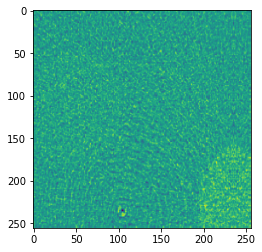

In [243]:
plt.imshow(sample[0].mean(0))

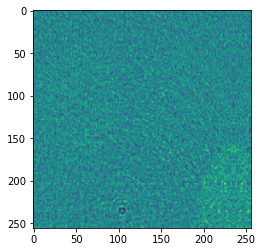

In [244]:
plt.imshow(sample[1].mean(0))

In [86]:
c_8_c = tifffile.imread(os.path.join(example_folder, '8', 'radios_corrected/denoized_scaled_0.tif'))
c_8_c = np.clip(c_8_c, -1, 1)

In [37]:
from skimage.restoration import denoise_nl_means, estimate_sigma

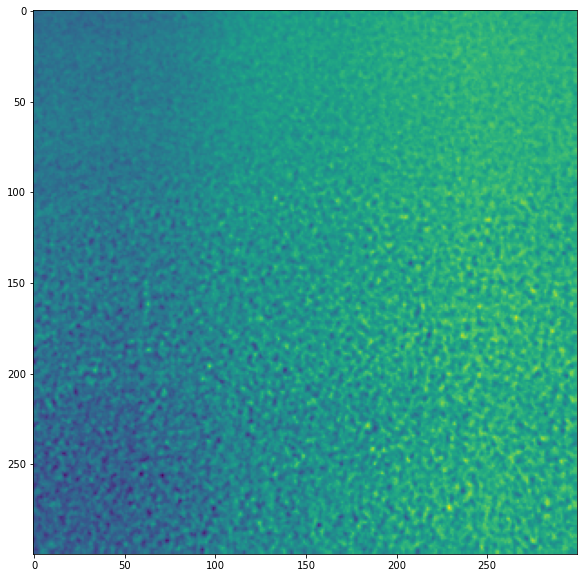

In [64]:
plt.figure(figsize=(10, 10))
plt.imshow(denoise_nl_means(c_4[0, 1000:1300, 600:900], patch_size=7, patch_distance=100))
plt.show()

In [67]:
peak_signal_noise_ratio(c_1[0, 1000:1300, 600:900], denoise_nl_means(c_4[0, 1000:1300, 600:900], patch_size=3, patch_distance=100))

37.96445214465066

In [68]:
peak_signal_noise_ratio(c_1[0, 1000:1300, 600:900],c_4_c[0, 1000:1300, 600:900])

39.29164401203402

In [76]:
patch_c_8 = denoise_nl_means(c_8[0, 1000:1300, 600:900], patch_size=3, patch_distance=100)
peak_signal_noise_ratio(c_1[0, 1000:1300, 600:900], patch_c_8)

36.49359406709755

In [70]:
peak_signal_noise_ratio(c_1[0, 1000:1300, 600:900],c_8_c[0, 1000:1300, 600:900])

37.14424201157912

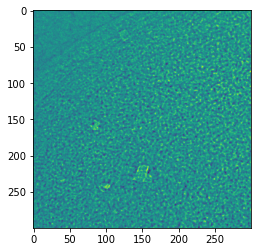

In [104]:
plt.imshow(c_1[0, 900:1200, 500:800])

In [106]:
patch_c_8 = denoise_nl_means(c_8[0, 900:1200, 500:800], patch_size=3, patch_distance=100)
peak_signal_noise_ratio(c_1[0, 900:1200, 500:800], patch_c_8)

37.57863806565139

In [107]:
peak_signal_noise_ratio(c_1[0, 900:1200, 500:800], c_8_c[0, 900:1200, 500:800])

38.21321324508948

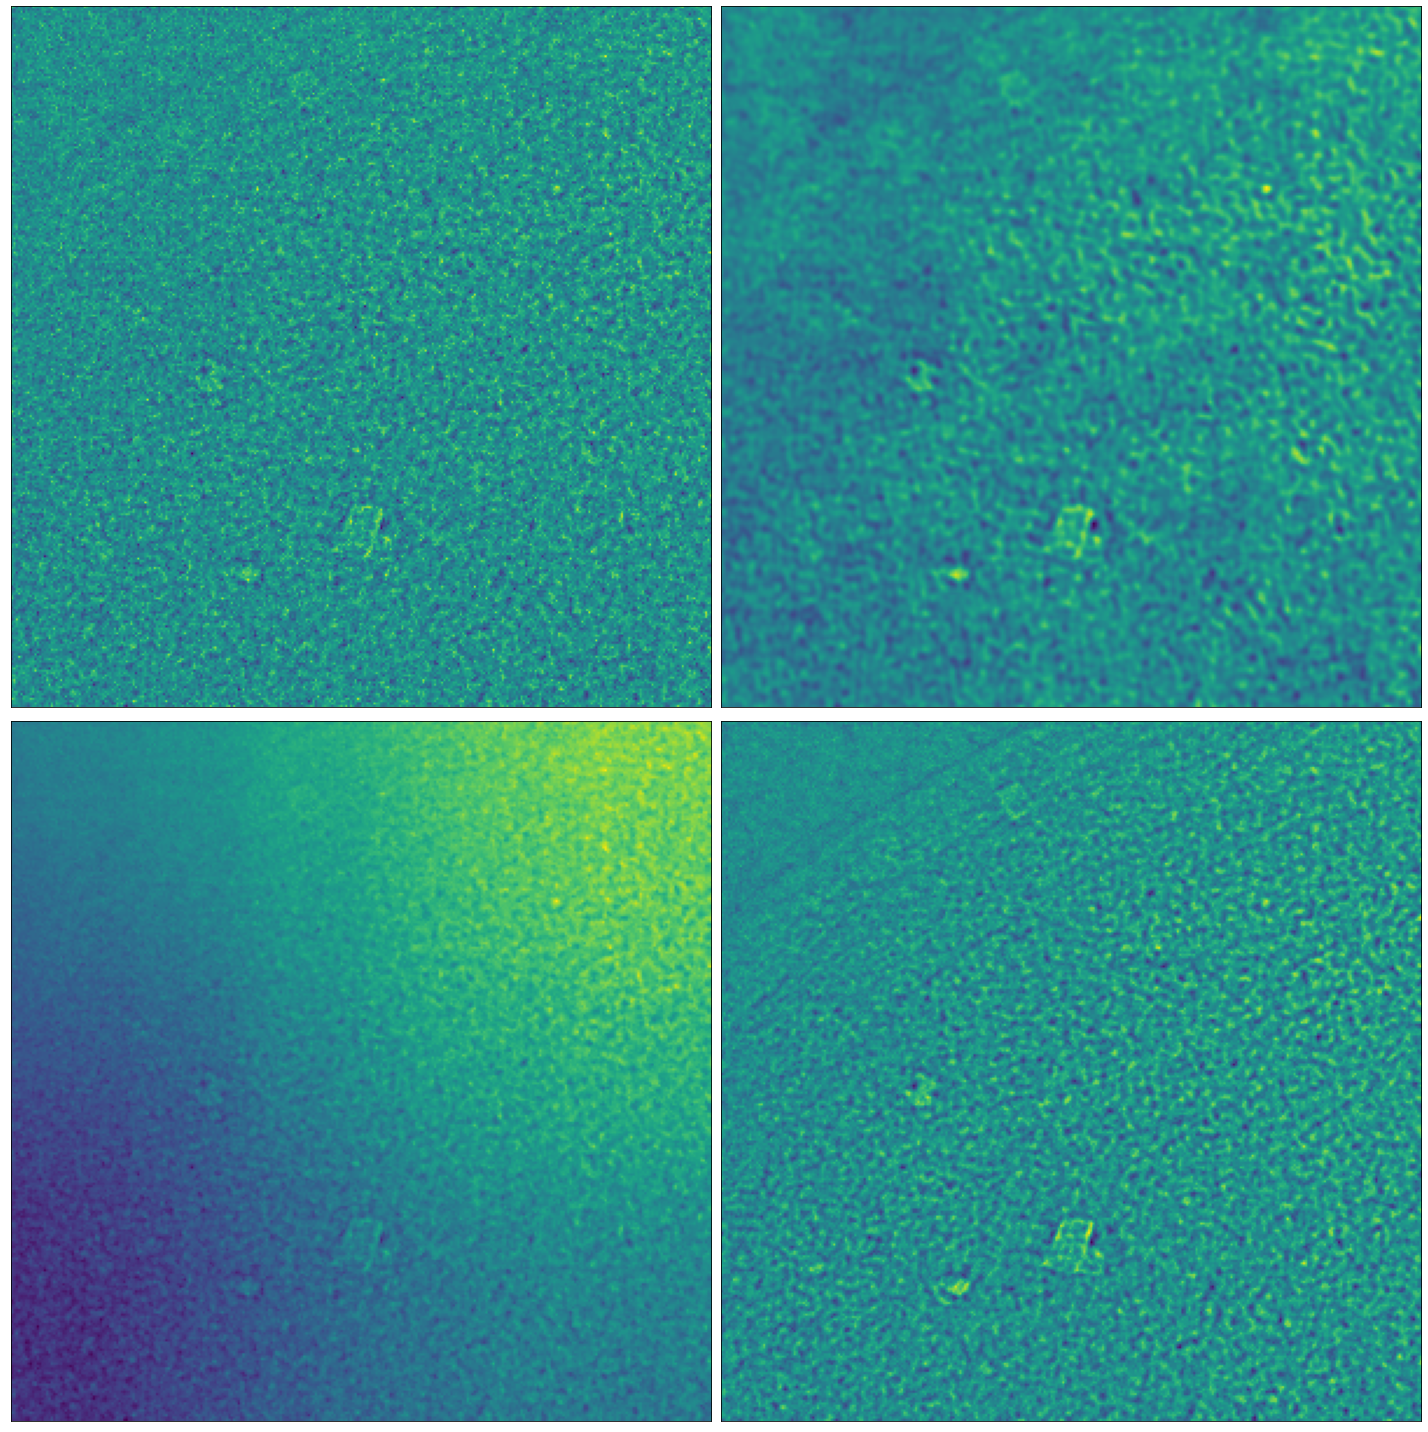

In [108]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

cax = axes[0][0]
cax.imshow(c_8[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

cax = axes[0][1]
cax.imshow(c_8_c[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

cax = axes[1][0]
cax.imshow(patch_c_8)
cax.set_xticks([])
cax.set_yticks([])

cax = axes[1][1]
cax.imshow(c_1[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

plt.tight_layout()
plt.show()

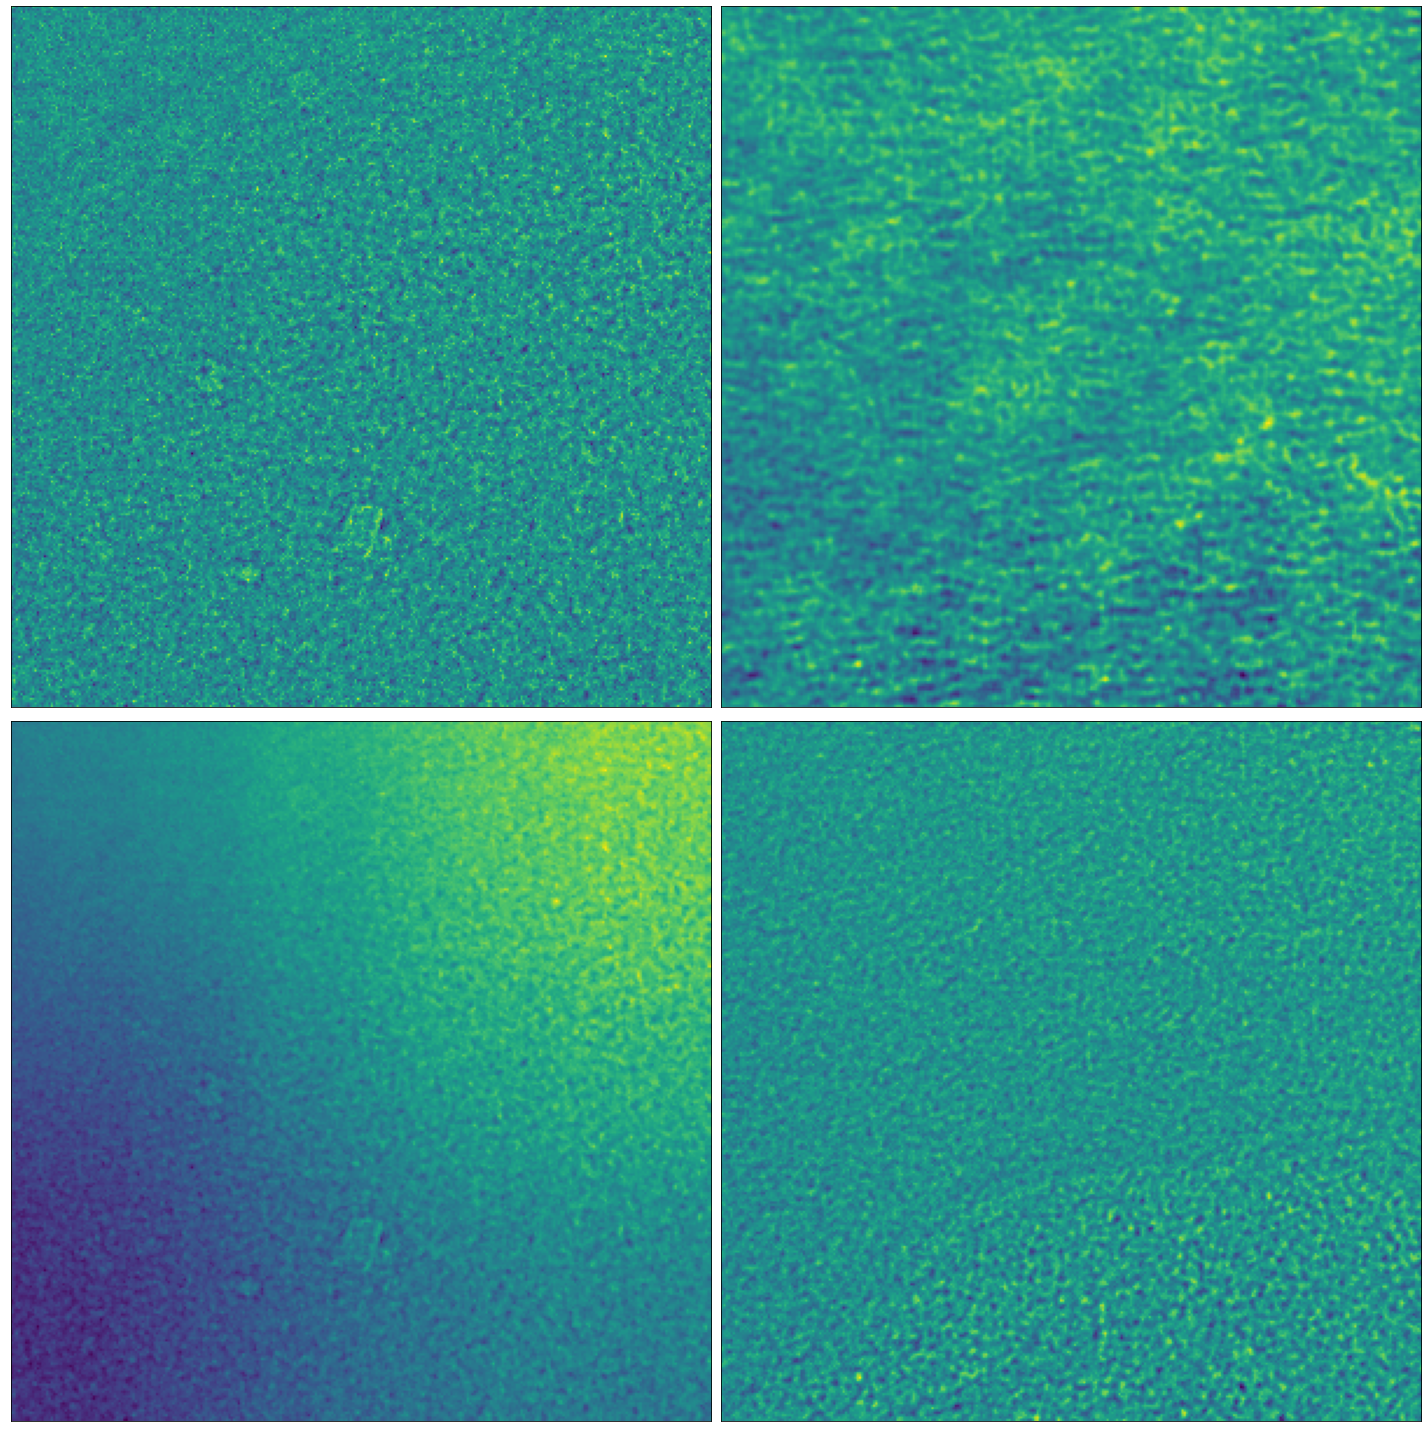

In [332]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

cax = axes[0][0]
cax.imshow(c_8[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

cax = axes[0][1]
cax.imshow(c_8_c[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

cax = axes[1][0]
cax.imshow(patch_c_8)
cax.set_xticks([])
cax.set_yticks([])

cax = axes[1][1]
cax.imshow(c_1[0, 900:1200, 500:800])
cax.set_xticks([])
cax.set_yticks([])

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import seaborn as sns

In [357]:
qualities_df = pd.DataFrame(qualities)

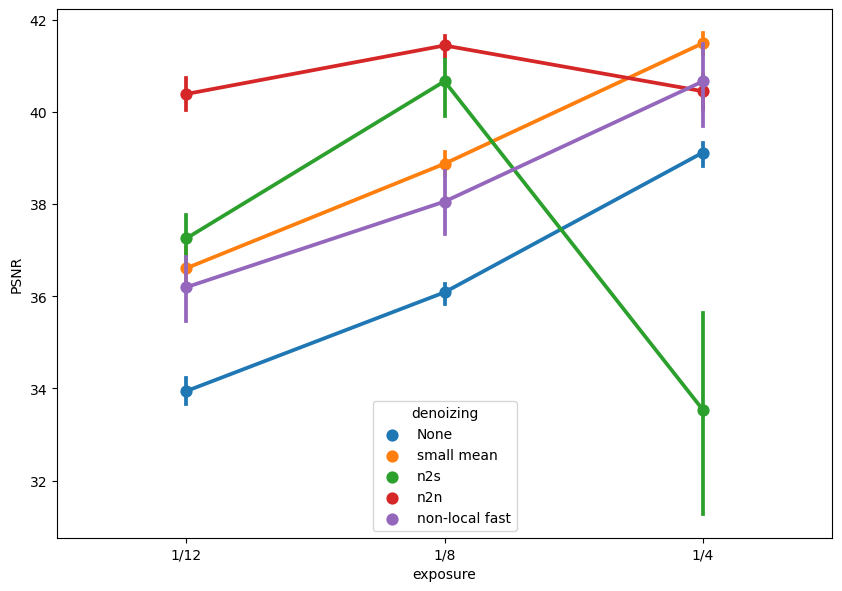

In [358]:
plt.figure(figsize=(10, 7), dpi=100,)
sns.pointplot(data=qualities_df, x='exposure', y='PSNR', hue='denoizing', hue_order=['None', 
                                                                                     'small mean', 
#                                                                                      'NN', 
                                                                                     'n2s', 
#                                                                                      'n2s_0.5', 
                                                                                     'n2n', 'non-local fast'])
plt.gca().axes.xaxis.set_ticklabels(['1/12', '1/8', '1/4'])
plt.show()